In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\MOHANKUMAR\Downloads\Career data Electronics - Sheet1.csv")
data['CONTROL SYSTEMS'] = data['CONTROL SYSTEMS'].map({'POOR':0,'BEGINNER':1,'AVERAGE':2,'INTERMEDIATE':3,'EXCELLENT':4,'PROFESSIONAL':5})
data['CIRCUIT DESIGN'] = data['CIRCUIT DESIGN'].map({'POOR':0,'BEGINNER':1,'AVERAGE':2,'INTERMEDIATE':3,'EXCELLENT':4,'PROFESSIONAL':5})
data['POWER ELECTRONICS'] = data['POWER ELECTRONICS'].map({'POOR':0,'BEGINNER':1,'AVERAGE':2,'INTERMEDIATE':3,'EXCELLENT':4,'PROFESSIONAL':5})
data['RF'] = data['RF'].map({'POOR':0,'BEGINNER':1,'AVERAGE':2,'INTERMEDIATE':3,'EXCELLENT':4,'PROFESSIONAL':5})
data['C++'] = data['C++'].map({'POOR':0,'BEGINNER':1,'AVERAGE':2,'INTERMEDIATE':3,'EXCELLENT':4,'PROFESSIONAL':5})
data['ELECTRICAL SYSTEM'] = data['ELECTRICAL SYSTEM'].map({'POOR':0,'BEGINNER':1,'AVERAGE':2,'INTERMEDIATE':3,'EXCELLENT':4,'PROFESSIONAL':5})
data['CAD'] = data['CAD'].map({'POOR':0,'BEGINNER':1,'AVERAGE':2,'INTERMEDIATE':3,'EXCELLENT':4,'PROFESSIONAL':5})
data['PCB'] = data['PCB'].map({'POOR':0,'BEGINNER':1,'AVERAGE':2,'INTERMEDIATE':3,'EXCELLENT':4,'PROFESSIONAL':5})
data['LABVIEW'] = data['LABVIEW'].map({'POOR':0,'BEGINNER':1,'AVERAGE':2,'INTERMEDIATE':3,'EXCELLENT':4,'PROFESSIONAL':5})
data['ANALOG COMMUNICATION'] = data['ANALOG COMMUNICATION'].map({'POOR':0,'BEGINNER':1,'AVERAGE':2,'INTERMEDIATE':3,'EXCELLENT':4,'PROFESSIONAL':5})
data["ANALOG COMMUNICATION"].fillna(0,inplace=True)
data['ANALOG COMMUNICATION']=data['ANALOG COMMUNICATION'].astype('int64')
data.dtypes


CIRCUIT DESIGN          int64
CONTROL SYSTEMS         int64
POWER ELECTRONICS       int64
ANALOG COMMUNICATION    int64
RF                      int64
C++                     int64
ELECTRICAL SYSTEM       int64
CAD                     int64
PCB                     int64
LABVIEW                 int64
ROLE                    int64
dtype: object

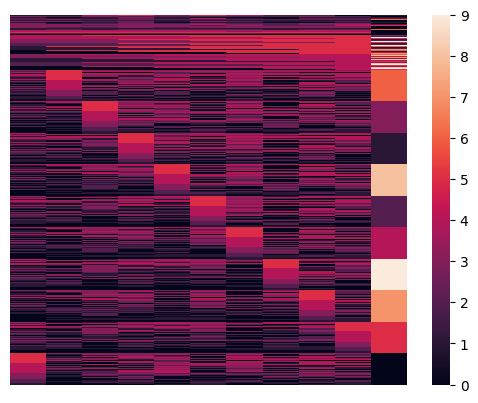

,CIRCUIT DESIGN,CONTROL SYSTEMS,POWER ELECTRONICS,ANALOG COMMUNICATION,RF,C++,ELECTRICAL SYSTEM,CAD,PCB,LABVIEW
0,0,1,1,5,0,3,2,1,0,0
1,1,1,4,5,3,5,4,2,2,0
2,2,2,2,2,2,2,3,2,3,3
3,3,2,3,2,2,2,2,2,3,2
4,3,0,3,2,1,3,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...
852,2,0,2,1,1,2,1,1,2,1
853,1,0,1,0,1,0,1,0,1,0
854,1,0,0,1,0,1,0,1,0,1
855,1,0,1,1,0,0,1,1,0,0


In [2]:

# importing the modules
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
xticklabels = False
yticklabels = False
  
# plotting the heatmap
hm = sn.heatmap(data=data,
                xticklabels=xticklabels,
                yticklabels=yticklabels)
  
# displaying the plotted heatmap
plt.show()
X = data.drop('ROLE',axis=1)
X

In [3]:
y= data['ROLE'].astype('int')
y

0      1
1      1
2      4
3      0
4      0
      ..
852    0
853    0
854    0
855    0
856    0
Name: ROLE, Length: 857, dtype: int32

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [6]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
y_pred = rf.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9069767441860465


In [9]:
import numpy as np
rf_grid={'n_estimators':np.arange(10,1000,10),'max_features':['auto','sqrt'],'max_depth':[None,3,5,10,20,30],'min_samples_split':[2,5,20,50,100],'min_samples_leaf':[1,2,5,10]}

In [10]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)


In [11]:
rs_rf.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\MOHANKUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\MOHANKUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\MOHANKUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past beha

C:\Users\MOHANKUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\MOHANKUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\MOHANKUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past beha

C:\Users\MOHANKUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\MOHANKUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\MOHANKUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past beha

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [12]:
rs_rf.best_score_

0.607547939616483

In [13]:
rs_rf.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [14]:
rf = RandomForestClassifier(n_estimators= 60,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = 'auto',
 max_depth = 30)

In [15]:
x = data.drop('ROLE',axis=1)
y=data['ROLE']
rf.fit(X,y)

C:\Users\MOHANKUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=30, max_features='auto', n_estimators=60)

In [16]:
import joblib
joblib.dump(rf,'career_guidance_predict')
model = joblib.load('career_guidance_predict')
data

,CIRCUIT DESIGN,CONTROL SYSTEMS,POWER ELECTRONICS,ANALOG COMMUNICATION,RF,C++,ELECTRICAL SYSTEM,CAD,PCB,LABVIEW,ROLE
0,0,1,1,5,0,3,2,1,0,0,1
1,1,1,4,5,3,5,4,2,2,0,1
2,2,2,2,2,2,2,3,2,3,3,4
3,3,2,3,2,2,2,2,2,3,2,0
4,3,0,3,2,1,3,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
852,2,0,2,1,1,2,1,1,2,1,0
853,1,0,1,0,1,0,1,0,1,0,0
854,1,0,0,1,0,1,0,1,0,1,0
855,1,0,1,1,0,0,1,1,0,0,0


In [17]:
a = pd.DataFrame({
'CIRCUIT DESIGN': 2,
'CONTROL SYSTEMS':2,
'POWER ELECTRONICS':4,    
'ANALOG COMMUNICATION':2,
'RF':3,
'C++':2,
'ELECTRICAL SYSTEM':1,
'CAD':2,
'PCB':2,
'LABVIEW':4},index=[0])
predict1 = model.predict(a)

In [18]:
print(predict1)

[3]


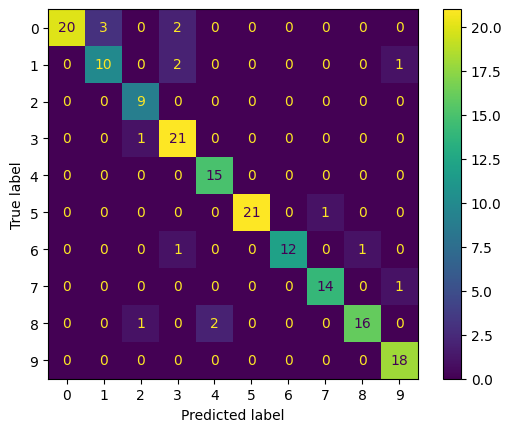

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
vis.plot()
plt.show()